<a href="https://colab.research.google.com/github/hiba0903/DSA_CS_Ast/blob/main/DSA_CS_UnsupervisedLearning_forcedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study On Unsupervised Learning**
 The force2020 data is given
 *  Read the dataset to the python environment.
 *  Tryout different clustering models in the force2020 dataset.
 * Find the optimum number of clusters in each model and create the model
 with the optimum number of clusters




### **Import necessary Libraries**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA

### **Loading the dataset**

In [17]:
force = pd.read_csv('/content/force2020_data.csv')

### **Understanding the data**

In [18]:
force.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [19]:
force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [20]:
force.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


### **Checking for any missing values**

In [21]:
force.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [22]:
force['NPHI'].fillna(force['NPHI'].mode()[0],inplace=True)
force['PEF'].fillna(force['PEF'].mode()[0],inplace=True)
force['DTC'].fillna(force['DTC'].mode()[0],inplace=True)

<ipython-input-22-02f70e4d9f71>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  force['NPHI'].fillna(force['NPHI'].mode()[0],inplace=True)
<ipython-input-22-02f70e4d9f71>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

### **Checking whether missing values are handled**

In [23]:
force.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


### **Detecting Outliers**

In [25]:
outlier_col=[]

for col in force.columns:
  q1=force[col].quantile(0.25)
  q3=force[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers = force[(force[col] < lower_bound) | (force[col] > upper_bound)][col]
  print(f"Number of outliers in {col}: {len(outliers)}")
  count=outliers.shape[0]

  if count>0:
    outlier_col.append(col)
print(outlier_col)


Number of outliers in RHOB: 0
Number of outliers in GR: 135
Number of outliers in DEPTH_MD: 0
Number of outliers in NPHI: 1
Number of outliers in PEF: 841
Number of outliers in DTC: 0
['GR', 'NPHI', 'PEF']


### **Handling Outlier By IQR method**

In [26]:
for column in outlier_col:
  q1=force[column].quantile(0.25)
  q3=force[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  force[column]=force[column].clip(lower=lower_bound,upper=upper_bound)


### **Checking whether outlier is handled succesfully**

In [27]:
outlier_col=[]

for col in force.columns:
  q1=force[col].quantile(0.25)
  q3=force[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers = force[(force[col] < lower_bound) | (force[col] > upper_bound)][col]
  print(f"Number of outliers in {col}: {len(outliers)}")
  count=outliers.shape[0]

  if count>0:
    outlier_col.append(col)
print(outlier_col)


Number of outliers in RHOB: 0
Number of outliers in GR: 0
Number of outliers in DEPTH_MD: 0
Number of outliers in NPHI: 0
Number of outliers in PEF: 0
Number of outliers in DTC: 0
[]


### **Correlation Heatmap**

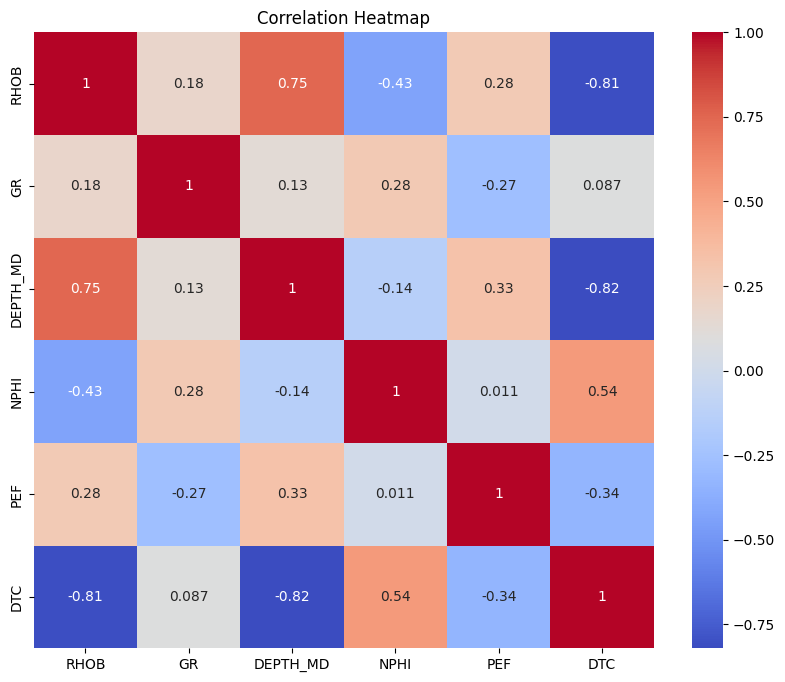

In [29]:
corr = force.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Scaling**

In [31]:
scaler = StandardScaler()
force_scaled = scaler.fit_transform(force)
force_scaled = pd.DataFrame(force_scaled,columns = force.columns)
force_scaled.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,-1.731721,-0.666574,2.395214,1.174713
1,-0.741163,0.612133,-1.731532,-0.666574,2.395214,1.157459
2,-0.718560,0.441774,-1.731342,-0.666574,2.395214,1.143404
3,-0.734045,0.367235,-1.731152,-0.666574,2.395214,1.142613
4,-0.773944,0.323128,-1.730963,-0.666574,2.395214,1.141924


### **Clustering**

In [33]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(force_scaled)

KMeans(n_clusters=3, random_state=42)

In [34]:
pred_cluster = k_means.predict(force_scaled)

In [35]:
pred_cluster

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [37]:
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,init="k-means++",max_iter=300,n_init=10)
  kmeans.fit(force_scaled)
  wcss.append(kmeans.inertia_)


### **ELbow graph**

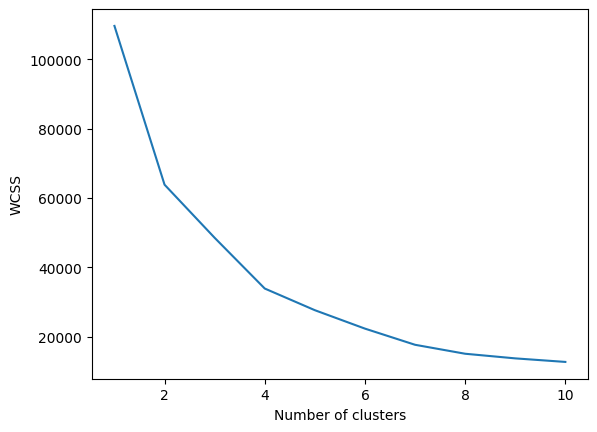

In [38]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**On looking into the elbow graph we can say that the optimal no:of cluster is 2**

### **Agglomerative CLustering**

In [46]:
agglo = AgglomerativeClustering(metric='euclidean',linkage='ward')
y_agglo = agglo.fit_predict(force_scaled)
y_agglo

array([0, 0, 0, ..., 1, 1, 1])

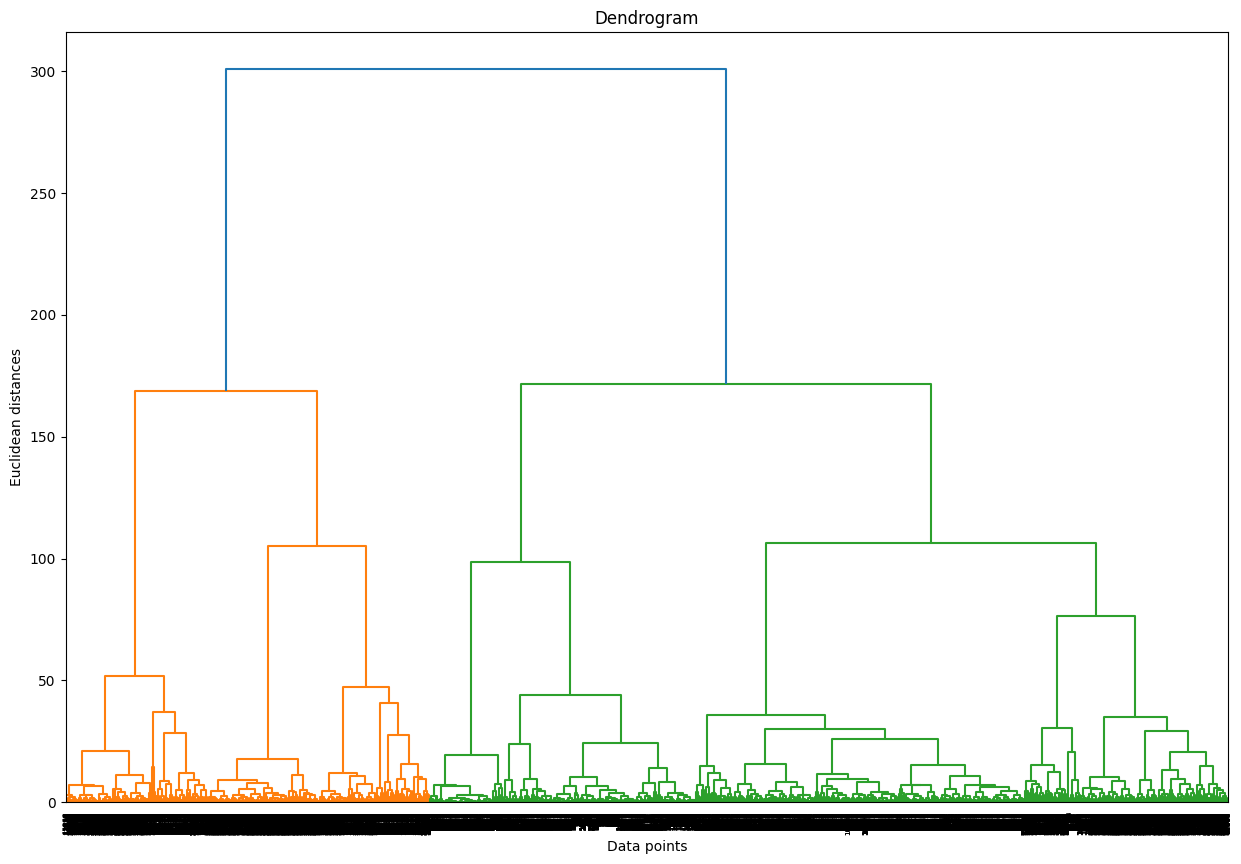

In [51]:
z=linkage(force_scaled,'ward')

plt.figure(figsize=(15,10))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')

plt.show()